In [6]:
# This notebook is the code to collect weather data for 500+ random cities
# using citipy and then analyze the relationsship between latitude and climate factors
# (temperature, humidity, wind_speed, cloudiness).
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# Create a set of random lat and lng combinations and then identify
# the nearest unique city for each lat lng combination. Create a 
# separate list of unknown cities.

lat_lngs = []
cities = []
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name  
    if city not in cities:
        cities.append(city)
len(cities)

611

In [8]:
# Fetch weather data from openweathermap,
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
print(response)

{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.09, 'feels_like': 32.23, 'temp_min': 48, 'temp_max': 48.2, 'pressure': 1022, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 20.8, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1603217528, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1603185882, 'sunset': 1603236703}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}


In [9]:
# Create lists of cities and weather data
city_name_log = []
city_id_log = []
unknown_cities = []
country_name_log=[]
lat = []
long=[]
temp=[]
humidity = []
cloudiness = []
wind_speed = []

query_url = f"{url}appid={weather_api_key}&units={units}&q="
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name_log.append(response['name'])
        city_id_log.append(response['id'])
        country_name_log.append(response["sys"]["country"])
        print(f"City Name and Number  = {response['name']}, {response['id']}")
    except: 
        unknown_cities.append(city) 

        

City Name and Number  = Hobart, 2163355
City Name and Number  = Punta Arenas, 3874787
City Name and Number  = Rikitea, 4030556
City Name and Number  = Comodoro Rivadavia, 3860443
City Name and Number  = Saskylakh, 2017155
City Name and Number  = Bathsheba, 3374083
City Name and Number  = Idritsa, 557588
City Name and Number  = Albany, 5106841
City Name and Number  = Hellvik, 3133472
City Name and Number  = Vaini, 4032243
City Name and Number  = Saint Augustine, 4170894
City Name and Number  = Goderich, 5962442
City Name and Number  = Cape Town, 3369157
City Name and Number  = Khatanga, 2022572
City Name and Number  = Hermanus, 3366880
City Name and Number  = Severo-Kuril'sk, 2121385
City Name and Number  = Peleduy, 2018069
City Name and Number  = New Norfolk, 2155415
City Name and Number  = Ushuaia, 3833367
City Name and Number  = Selu, 1257762
City Name and Number  = Nauta, 3692020
City Name and Number  = Port Elizabeth, 964420
City Name and Number  = Bubaque, 2374583
City Name and Nu

City Name and Number  = Arrondissement de Langres, 3007679
City Name and Number  = Khovd, 1516048
City Name and Number  = Erzin, 296852
City Name and Number  = Grindavik, 3416888
City Name and Number  = El Salvador, 3585968
City Name and Number  = Buraidah, 107304
City Name and Number  = Benguela, 3351663
City Name and Number  = Souillac, 933995
City Name and Number  = Santa Maria, 3450083
City Name and Number  = Saint-Philippe, 935215
City Name and Number  = La Palma, 5364022
City Name and Number  = Terrace, 6162949
City Name and Number  = Westport, 4845585
City Name and Number  = Vila Velha, 3445026
City Name and Number  = Amapá, 3407762
City Name and Number  = San Jerónimo, 3929611
City Name and Number  = Lagunas, 3695844
City Name and Number  = Safi, 2537881
City Name and Number  = Norman Wells, 6089245
City Name and Number  = Ous, 1495812
City Name and Number  = Sur, 286245
City Name and Number  = Sisimiut, 3419842
City Name and Number  = Fortuna, 5563839
City Name and Number  = R

City Name and Number  = Al Bardīyah, 80509
City Name and Number  = Ixtapa, 4004293
City Name and Number  = Yershov, 467120
City Name and Number  = Palekastro, 256155
City Name and Number  = Mabaruma, 3377301
City Name and Number  = Kautokeino, 779330
City Name and Number  = Ponta do Sol, 2264557
City Name and Number  = Sorong, 1626542
City Name and Number  = Sándorfalva, 715924
City Name and Number  = Sittwe, 1295765
City Name and Number  = Tautira, 4033557
City Name and Number  = Dakar, 2253354
City Name and Number  = Tessalit, 2449893
City Name and Number  = Yar-Sale, 1486321
City Name and Number  = Mayumba, 2399001
City Name and Number  = Kedrovyy, 1538641
City Name and Number  = Necochea, 3430443
City Name and Number  = Concepción del Oro, 4013039
City Name and Number  = Pimenta Bueno, 3924908
City Name and Number  = Aktau, 610612
City Name and Number  = Yauya, 3690733
City Name and Number  = Santa Rosalía, 3983805
City Name and Number  = Alexandria, 361058
City Name and Number  = 

In [10]:
print(f"The following cities were not found:\n {unknown_cities}\n")

The following cities were not found:
 ['mys shmidta', 'kamenskoye', 'taolanaro', 'galgani', 'illoqqortoormiut', 'mouzakion', 'karauzyak', 'tumannyy', 'umzimvubu', 'marcona', 'barentsburg', 'tempoal', 'palabuhanratu', 'amderma', 'nguiu', 'barbar', 'samalaeulu', 'toliary', 'grand centre', 'kazalinsk', 'nizhneyansk', 'alotau', 'barawe', 'halalo', 'belushya guba', 'grand river south east', 'temaraia', 'attawapiskat', 'sorvag', 'zaplyusye', 'kadykchan', 'bur gabo', 'laiagam', 'naugarzan', 'haibowan', 'saleaula', 'malwan', 'tsihombe', 'zhanatas', 'koboldo', 'tingrela', 'sataua', 'zhitikara', 'karamea', 'vaitupu', 'tarudant', 'cheuskiny', 'a', 'sahrak', 'phun phin', 'jabiru', 'karmana', 'sentyabrskiy', 'dujuma']



In [11]:
# Create a dataframe with the city and climate data
d = {"City Name" : city_name_log, "Country": country_name_log, "City ID": city_id_log, "Latitude": lat, "Longitude": long, "Max Temperature": temp,
     "Humidity": humidity, "Cloudiness (%)": cloudiness, "Wind Speed": wind_speed}
city_df = pd.DataFrame(d)
city_df.head()

,City Name,Country,City ID,Latitude,Longitude,Max Temperature,Humidity,Cloudiness (%),Wind Speed
0,Hobart,AU,2163355,-42.88,147.33,53.60,81,90,4.70
1,Punta Arenas,CL,3874787,-53.15,-70.92,48.20,45,75,20.80
2,Rikitea,PF,4030556,-23.12,-134.97,73.27,80,3,13.65
3,Comodoro Rivadavia,AR,3860443,-45.87,-67.50,55.40,37,0,17.22
4,Saskylakh,RU,2017155,71.92,114.08,20.86,97,85,7.00


In [17]:
#  Delete cities that have humidity over 100%, if any, and export the City_Data into a csv

Humidity_df = city_df.loc[city_df["Humidity"]>100]
city_df.drop(city_df.index[city_df.Humidity > 100])
city_df.to_csv("output_data/WeatherPy_Log.csv", index=False)


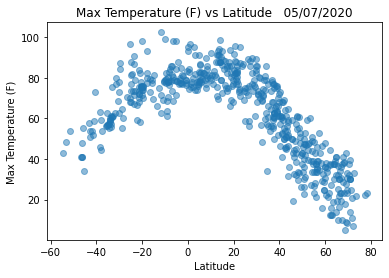

This plot shows the relationship between average temperature and latitude for the cities generated. 
Some coordinates were missing data on the weather website and they are listed above.
There is a visible linear relationship between Latitude and temperature


FileNotFoundError: [Errno 2] No such file or directory: '../output_data/Temp_Lat.png'

In [18]:
# Create plots for temperature vs latitude
Temp_Lat= plt.scatter(lat, temp,  alpha=0.5)
plt.title('Max Temperature (F) vs Latitude   05/07/2020')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between average temperature and latitude for the cities generated. \nSome coordinates were missing data on the weather website and they are listed above.")
print(f"There is a visible linear relationship between Latitude and temperature")

fig = Temp_Lat.get_figure()
fig.savefig("../output_data/Temp_Lat.png")



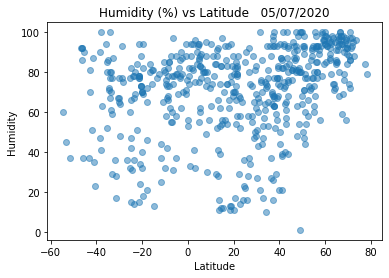

This plot shows the relationship between humidity and latitude for the cities generated. 
Some coordinates were missing data on the weather website and they are listed below.
The maximum humidity is 100% and no city recorded a humidity greater than 100%


In [20]:
# Create plots for Humidity vs Latitude
Hum_Lat=plt.scatter(lat, humidity,  alpha=0.5)
plt.title('Humidity (%) vs Latitude   05/07/2020')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between humidity and latitude for the cities generated. \nSome coordinates were missing data on the weather website and they are listed below.")
print(f"The maximum humidity is 100% and no city recorded a humidity greater than 100%")


fig = Hum_Lat.get_figure()
fig.savefig("output_data/Hum_Lat.png")

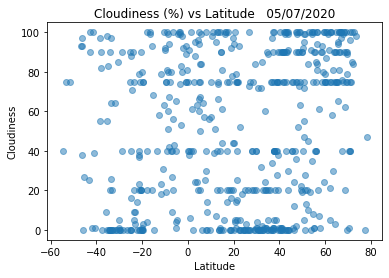

This plot shows the relationship between cloudiness and latitude for the cities generated. 
Some cities were missing data on the weather website and they are listed below
There is no evident relationship between Cloudiness and latitude.


In [21]:
# Create plots for Cloudiness vs Latitude

Cloud_Lat = plt.scatter(lat, cloudiness,  alpha=0.5)
plt.title('Cloudiness (%) vs Latitude   05/07/2020')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between cloudiness and latitude for the cities generated. \nSome cities were missing data on the weather website and they are listed below")
print(f"There is no evident relationship between Cloudiness and latitude.")
fig = Cloud_Lat.get_figure()
fig.savefig("output_data/Cloud_Lat.png")

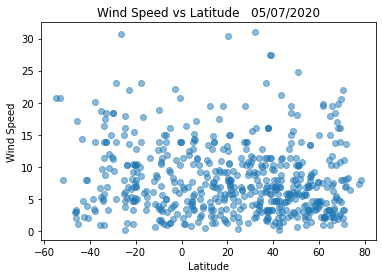

This plot shows the relationship between wind speed and latitude for the cities generated. 
 some cities were missing data on the weather website and they are listed below


In [22]:
# Create plots for wind speed vs latitude

Wind_Lat = plt.scatter(lat, wind_speed,  alpha=0.5)
plt.title('Wind Speed vs Latitude   05/07/2020')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between wind speed and latitude for the cities generated. \n some cities were missing data on the weather website and they are listed below")

fig = Wind_Lat.get_figure()
fig.savefig("output_data/Wind_Lat.png")


In [24]:
# Create Northern and Southern Hemisphere DataFrames and create a 
# function to create Linear Regression plots.
df_North = city_df.loc[city_df["Latitude"]>0]
df_South = city_df.loc[city_df["Latitude"]<0]

Regression_Data_Y=[df_South['Max Temperature'], df_North['Max Temperature'], df_South["Humidity"],
                   df_North["Humidity"], df_South["Cloudiness (%)"], df_North["Cloudiness (%)"], 
                   df_South["Wind Speed"], df_North["Wind Speed"]]

Regression_Data_X = [df_South['Latitude'], df_North['Latitude'], df_South['Latitude'], df_North['Latitude'],
df_South['Latitude'],df_North['Latitude'], df_South['Latitude'], df_North['Latitude']]

Regression_Data_Labels = ["Max Temperature South", "Max Temperature North", "Humidity South", "Humidity North",
                          "Cloudiness (%) South","Cloudiness (%) North", "Wind Speed South", "Wind Speed North"]


Plot for the linear regression of Max Temperature South and latitude.
The r-squared for Max Temperature South is: 0.5322091678969406


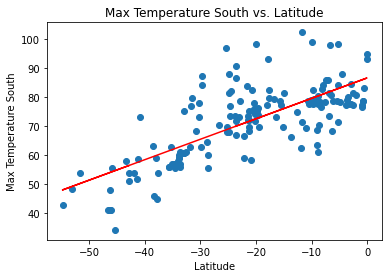



Plot for the linear regression of Max Temperature North and latitude.
The r-squared for Max Temperature North is: 0.7931983861817309


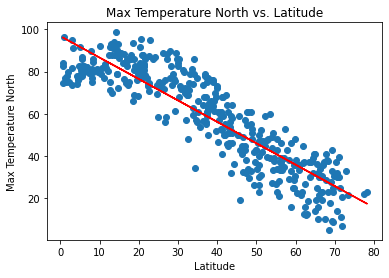



Plot for the linear regression of Humidity South and latitude.
The r-squared for Humidity South is: 0.009322817260175071


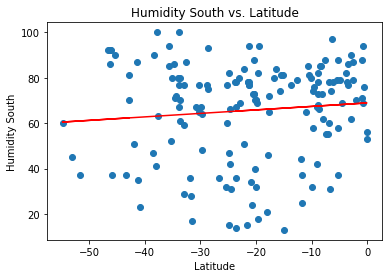



Plot for the linear regression of Humidity North and latitude.
The r-squared for Humidity North is: 0.11473877931789464


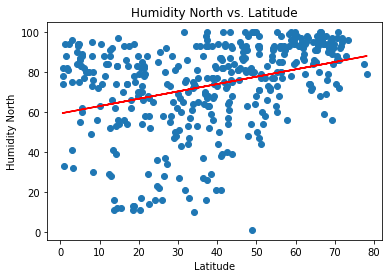



Plot for the linear regression of Cloudiness (%) South and latitude.
The r-squared for Cloudiness (%) South is: 0.041890271842355886


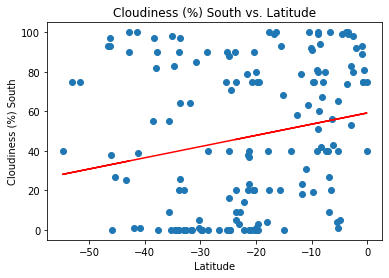



Plot for the linear regression of Cloudiness (%) North and latitude.
The r-squared for Cloudiness (%) North is: 0.06526410050089644


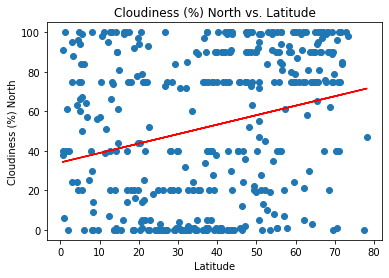



Plot for the linear regression of Wind Speed South and latitude.
The r-squared for Wind Speed South is: 0.00637198158795151


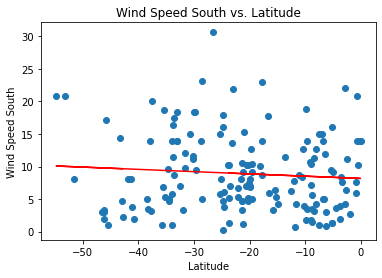



Plot for the linear regression of Wind Speed North and latitude.
The r-squared for Wind Speed North is: 0.0004897654588658832


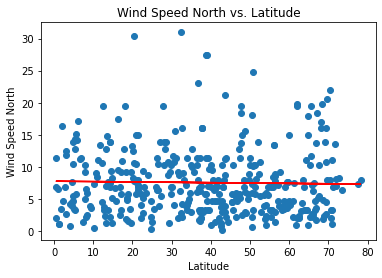

In [26]:
for i in range(8):

    x_values = Regression_Data_X[i]
    y_values = Regression_Data_Y[i]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    Data = plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title((Regression_Data_Labels[i]) + ' vs. Latitude')

    #plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.ylabel(Regression_Data_Labels[i])
    plt.xlabel('Latitude')

    print(f"Plot for the linear regression of {Regression_Data_Labels[i]} and latitude.")
    print(f"The r-squared for {Regression_Data_Labels[i]} is: {rvalue**2}")
    plt.show()

    fig = Data.get_figure()
    filename = (f"output_data/linear regression of {Regression_Data_Labels[i]} vs Latitude.png")
    fig.savefig(filename)
    plt.show()
    print(f"\n")


In [27]:
# Print plot analysis for the linear regression plots.

print(f"   The first two plots show the relationship between temperature and latitude. There is an evident \n\
visual correlation and the r**2 values of .64 and .62 respectively give a fairly high confidence that temperature \n\
is strongly affected by latitude, especially in the Northern hemisphere. There are some outliers, especially in the \n\
Southern Hemisphere. Presumably these indicate factors other than Latitude which also influence temperature.")
    
print(f"    The second pair of plots show the relationship between Humidity and Latitude. There is no consistent pattern and \n\
the r **2 values are also quite low.")
      
print(f"    The third pair of plots show the relationship between Cloudiness and Latitude. There is no consistent pattern and \n\
the r **2 values are also quite low. The data is affected by a large number of data points at both 0 and 100%.")

print(f"    The final pair of plots show the relationship between Wind Speed and Latitude. The data appear visually \n\
to cluster around the linear regression line, but the r **2 values are still quite low, implying no linear \n\
correlation. The Northern Hemisphere has generally higher wind speeds and more outliers than the Southern Hemisphere.")

   The first two plots show the relationship between temperature and latitude. There is an evident 
visual correlation and the r**2 values of .64 and .62 respectively give a fairly high confidence that temperature 
is strongly affected by latitude, especially in the Northern hemisphere. There are some outliers, especially in the 
Southern Hemisphere. Presumably these indicate factors other than Latitude which also influence temperature.
    The second pair of plots show the relationship between Humidity and Latitude. There is no consistent pattern and 
the r **2 values are also quite low.
    The third pair of plots show the relationship between Cloudiness and Latitude. There is no consistent pattern and 
the r **2 values are also quite low. The data is affected by a large number of data points at both 0 and 100%.
    The final pair of plots show the relationship between Wind Speed and Latitude. The data appear visually 
to cluster around the linear regression line, but the r **2 value